In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.sparse import diags
from scipy.linalg import expm

In [3]:
hbar = 1.0      #! Reduced Planck's constant
m = 1.0         #! Particle mass
L = 10.0        #! Length of domain
N = 500         #! Number of spatial points
dx = L / N      #! Spatial step size
dt = 0.005      #! Total Simulation Time
T = 0.2         #! Total simulation time


In [4]:
x = np.linspace(-L / 2, L / 2, N)
x[0]

-5.0

In [5]:
omega = 1.0
V = 0.5 * m * omega ** 2 * x ** 2
type(V)

numpy.ndarray

In [6]:
kinetic = -0.5 * (hbar ** 2 / m ) * diags([1,-2,1],[-1,0,1],shape=(N, N))/ dx ** 2
potential = diags(V, 0)
H = kinetic + potential

In [7]:
H

<500x500 sparse matrix of type '<class 'numpy.float64'>'
	with 1498 stored elements (3 diagonals) in DIAgonal format>

In [8]:
x0 = 0.0  #! Initial position
k0 = 5.0  #! Initial Momentum
psi0 = np.exp(-(x - x0) ** 2 / 2) * np.exp(1j * k0 * x)
psi0 /= np.sqrt(np.sum(np.abs(psi0) ** 2) * dx)

In [9]:
U = expm((-1j * H * dt / hbar).toarray())


In [10]:
times = np.arange(0 , T , dt)
psi = psi0.copy()
probDensity = []

In [11]:
for t in times:
    psi = U @ psi
    probDensity.append(np.abs(psi) ** 2)

In [12]:
probDensity = np.array(probDensity)

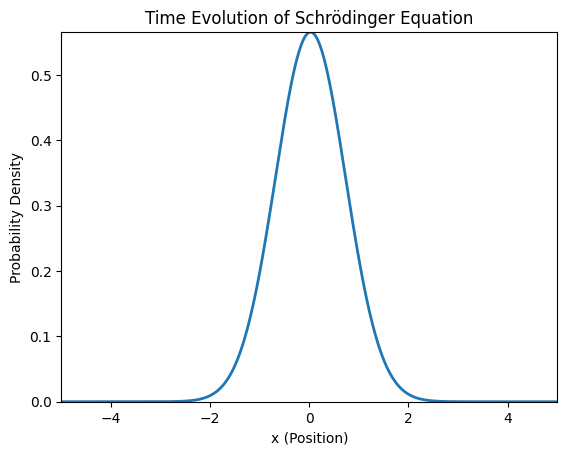

In [19]:


fig, ax = plt.subplots()
ax.set_xlim(-L / 2, L / 2)
ax.set_ylim(0, np.max(probDensity))
line, = ax.plot(x, probDensity[0], lw=2)
ax.set_title("Time Evolution of Schrödinger Equation")
ax.set_xlabel("x (Position)")
ax.set_ylabel("Probability Density")

def update(frame):
    line.set_ydata(probDensity[frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(times), interval=50, blit=False)

ani